In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# 1. Read the dataset

In [2]:
data = pd.read_excel(r'C:\Users\DELL\Downloads\iris (1).xls')

In [3]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [28]:
data.shape

(150, 5)

# 2.Checking Miss values

In [4]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

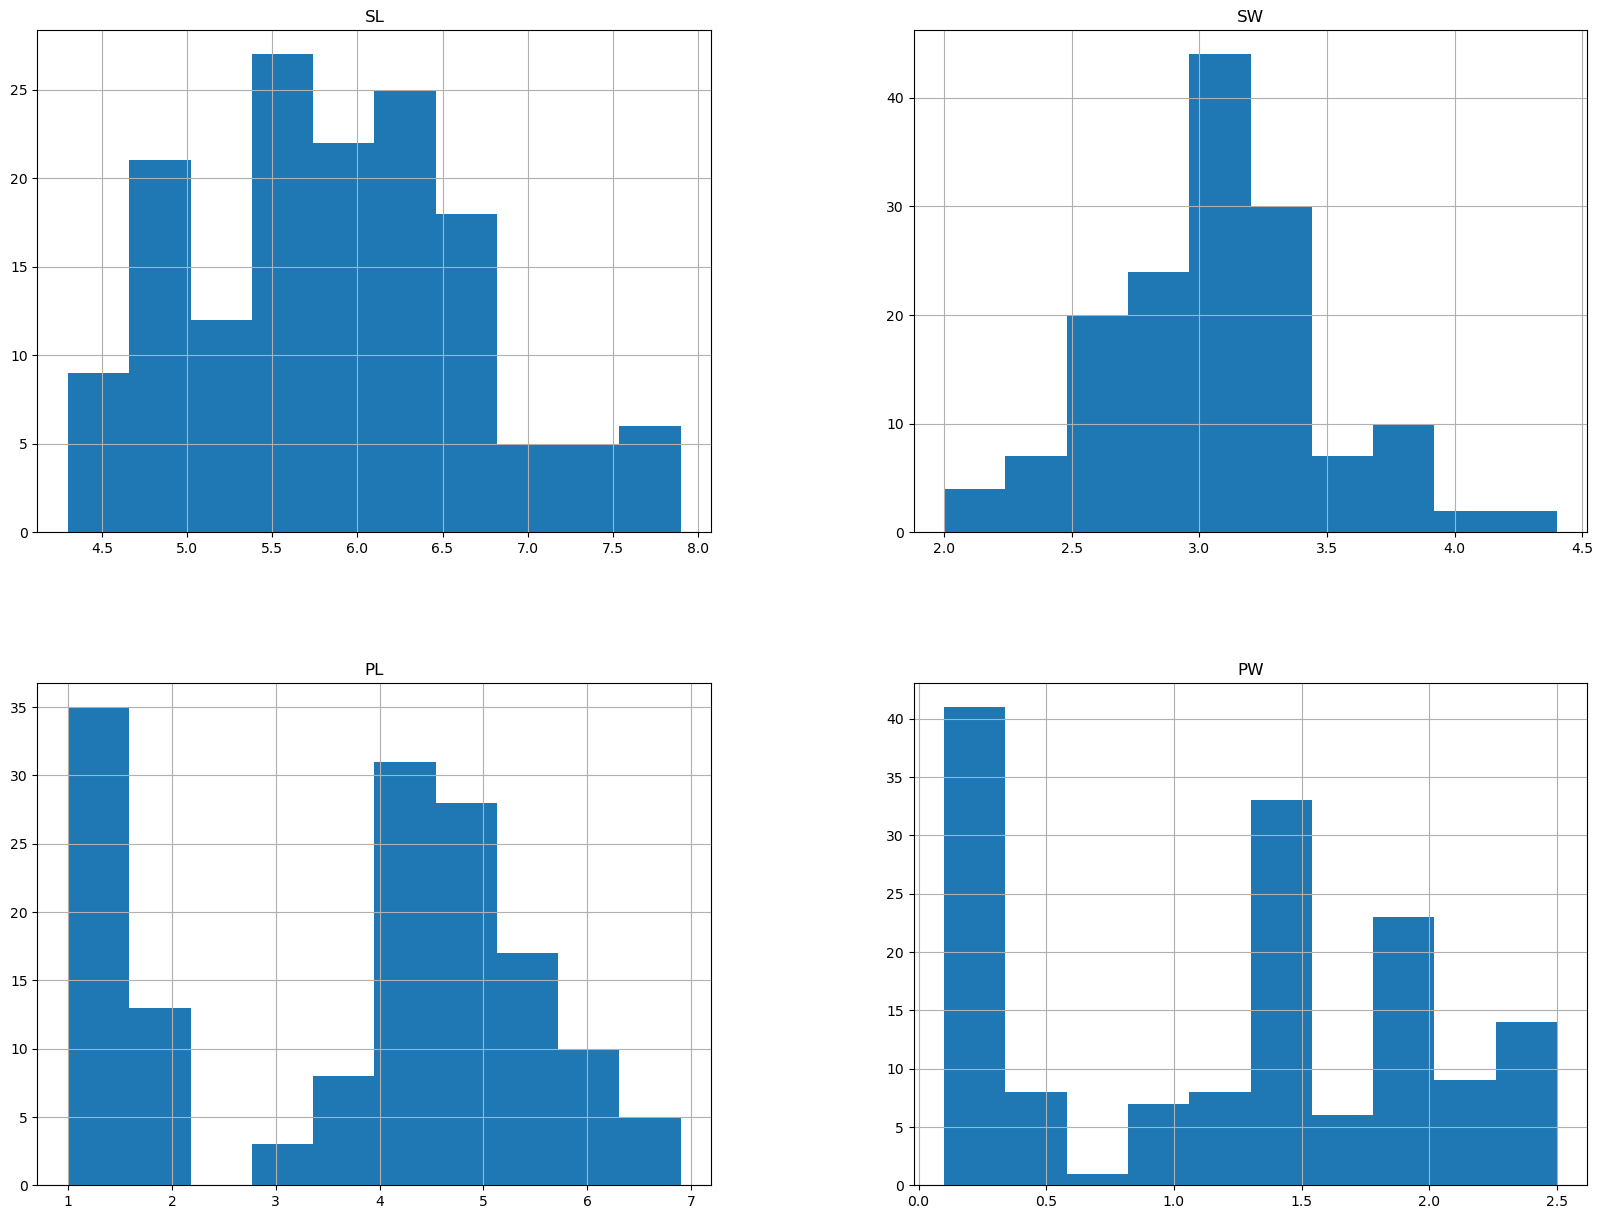

In [29]:
freqgraph = data.select_dtypes(include =['float'])
freqgraph.hist(figsize=(20,15))
plt.show()

In [30]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [5]:
for col in['SL','SW','PL']:
    data[col]=data[col].fillna(data[col].median())

In [6]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

# 3. Outlier Handling

In [32]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

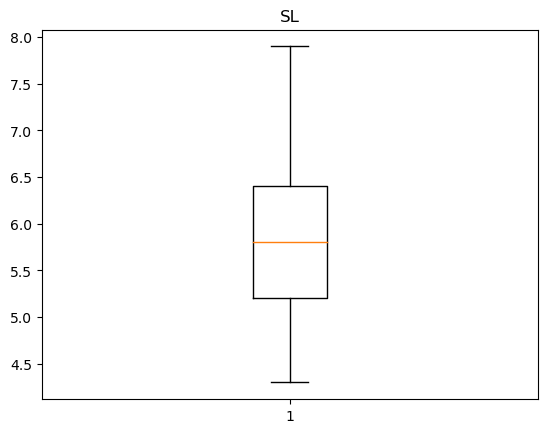

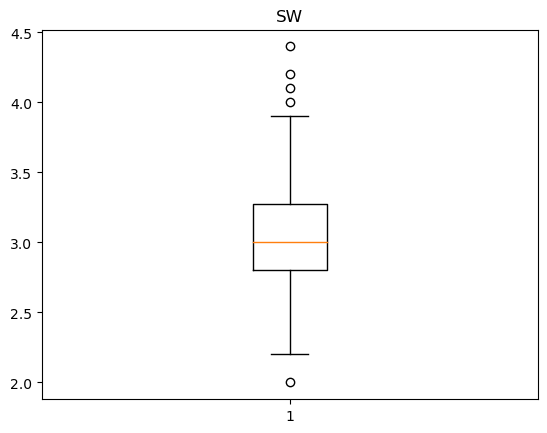

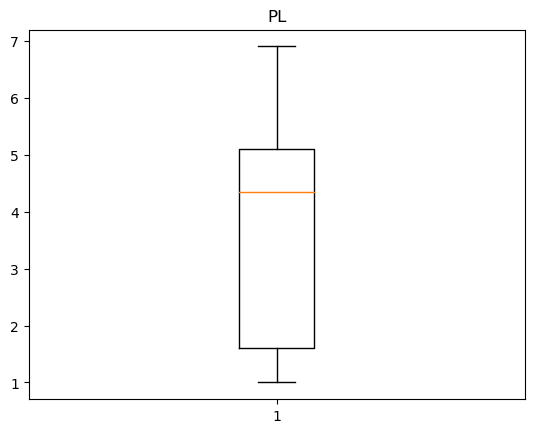

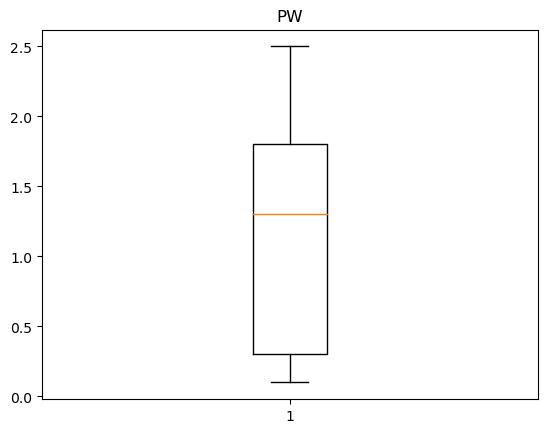

In [9]:
num_cols= ['SL', 'SW', 'PL', 'PW']

for i in num_cols:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)

In [33]:
#handling outline
Q1 = np.percentile(data['SW'],25,interpolation = 'midpoint')
Q2 = np.percentile(data['SW'],50,interpolation = 'midpoint')
Q3 = np.percentile(data['SW'],75,interpolation = 'midpoint')

print("Q1 is ", Q1)
print("Q2 is ", Q2)
print("Q3 is ", Q3)

# finding IQR value

IQR = Q3-Q1
print("The IQR is",IQR)

# find the upper limit and lower limit

up_lim = Q3+1.5*IQR
lw_lim = Q1-1.5*IQR

print("The upper limit is ",up_lim)
print("The lower limit is", lw_lim)

# finding outliers

outliers = []
for x in data['SW']:
    if(x>up_lim) or (x<lw_lim):
        outliers.append(x)
        
outliers

Q1 is  2.8
Q2 is  3.0
Q3 is  3.25
The IQR is 0.4500000000000002
The upper limit is  3.9250000000000003
The lower limit is 2.1249999999999996


C:\Users\DELL\AppData\Local\Temp\ipykernel_8948\3239576331.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(data['SW'],25,interpolation = 'midpoint')
C:\Users\DELL\AppData\Local\Temp\ipykernel_8948\3239576331.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2 = np.percentile(data['SW'],50,interpolation = 'midpoint')
C:\Users\DELL\AppData\Local\Temp\ipykernel_8948\3239576331.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or

[4.0, 4.4, 4.1, 4.2, 2.0]

In [34]:
ind1 = data['SW']<lw_lim
data.loc[ind1].index

Int64Index([60], dtype='int64')

In [35]:
ind2 = data['SW']>up_lim
data.loc[ind2].index

Int64Index([14, 15, 32, 33], dtype='int64')

In [36]:
#dropping the outliers
data.drop([60,14, 15, 32, 33],inplace = True)

In [37]:
data.shape

(145, 5)

# 4.Encode the categorical variables

In [10]:
#import labelencoder
from sklearn.preprocessing import LabelEncoder

In [11]:
label_encoder = LabelEncoder()

In [12]:
data['Classification'] = label_encoder.fit_transform(data["Classification"])

In [13]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.8,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [14]:
data.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification      int32
dtype: object

In [15]:
data['Classification'].value_counts()

0    50
1    50
2    50
Name: Classification, dtype: int64

In [16]:
x=data.drop(['Classification'],axis=1)
y=data['Classification']

In [17]:
#import train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# 3.Logistic Regression

In [18]:
#import logistic regression
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred_lr=logit_model.predict(x_test)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
#import confusion matrix,accuracy score,precision score,recall score and f1 score
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('Accuracy= ',accuracy_score(y_test,y_pred_lr))
print('Precision= ',precision_score(y_test,y_pred_lr,average='micro'))
print('Recall= ',recall_score(y_test,y_pred_lr,average='micro'))
print('f1 score= ',f1_score(y_test,y_pred_lr,average='micro'))

Accuracy=  1.0
Precision=  1.0
Recall=  1.0
f1 score=  1.0


In [20]:
confusion_matrix(y_test,y_pred_lr)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [21]:
y_pred_lr

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

# k-NN

In [22]:
#importing  kNeighbors classifier
from sklearn.neighbors import KNeighborsClassifier
metric = []
neighbors = np.arange(3,15)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski',p=2)
    classifier.fit(x_train,y_train)
    y_pred_knn=classifier.predict(x_test)
    acc = accuracy_score(y_test,y_pred_knn)
    metric.append(acc)

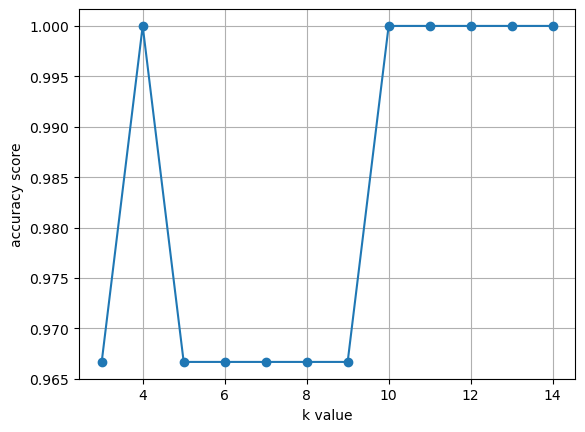

In [23]:
plt.plot(neighbors,metric,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy score')
plt.grid()

In [39]:
classifier = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski',p=2)
classifier.fit(x_train,y_train)
y_pred_knn=classifier.predict(x_test)

In [40]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('Accuracy= ',accuracy_score(y_test,y_pred_knn))
print('Precision= ',precision_score(y_test,y_pred_knn,pos_label='positive',average='micro'))
print('Recall= ',recall_score(y_test,y_pred_knn,average='micro'))
print('f1 score= ',f1_score(y_test,y_pred_knn,average='micro'))

Accuracy=  1.0
Precision=  1.0
Recall=  1.0
f1 score=  1.0


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [41]:
confusion_matrix(y_test,y_pred_lr)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

Among this both classifiers ie, logistic regression and k-nn , boths shows the same result..that means both classifiers show the accuracy 1.0